In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

### Задание 1
Загрузите датасет из файла heart.csv со следующими полями (выборка об уровне сердечных заболеваний:
<ul>
<li>age : Возраст
<li>sex : Пол (1 = мужской; 0 = женский)
<li>cp : боль в груди (0 - типичная, 1 - асимптотическая, 2 - неангинальная, 3 - нетипичная).
<li>trestbps : кровяное давление в состоянии покоя.
<li>chol : холестерин сыворотки в мг/дл.
<li>fbs : уровень сахара в крови натощак > 120 мг/дл (1 = верно; 0 = неверно)
<li>restecg : результаты электрокардиографии в состоянии покоя
<li>thalach : максимальная частота сердечных сокращений
<li>exang : стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
<li>oldpeak : депрессия ST, вызванная нагрузкой по сравнению с отдыхом.
<li>slope : Наклон пикового сегмента ST при нагрузке.
<li>ca : количество крупных сосудов, окрашенных флюороскопически (0–3).
<li>thal : (3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект)
<li>target : АГД - Диагностика заболеваний сердца (1 = да; 0 = нет)
</ul>
<ol>
<li>Выведите полученный датасет на экран
<li>Пользуясь загруженным датасетом, подтвердите или опровергните гипотезу, что доля населения, страдающего сердечными заболеваниями в городе N, превышает 46% (выведите "да", если это так, и "нет" в противном случае). Также выведите на экран полученное значение p-value, округлив его до 6 знаков после запятой.
</ol>    

In [7]:
# 1
heart = pd.read_csv(r'heart.csv')
print(heart)

# 2
p_value = stats.binomtest(heart['target'].sum(), len(heart), p=0.46, alternative='greater').pvalue
print(f"{'да' if p_value < 0.05 else 'нет'}\np_value = {p_value:.6f}")

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

### Задание 2
Есть предположение, что среднее давление мужчин и женщин в состоянии покоя в городе N не отличается. Но некоторыми учеными была выдвинута гипотеза, что женщины имеют среднее давление выше чем мужины. Примите или опровергните альтернативную гипотезу. Для этого предварительно убедитесь, что генеральные совокупности имеют равные дисперсии и что обе выборки имеют распределение, близкое к нормальному (с помощью гистограммы). Выведите значение p-value, округлив до 6 знаков после запятой.


(array([ 5., 27., 40., 56., 38., 23.,  9.,  6.,  2.,  1.]), array([ 94. , 103.8, 113.6, 123.4, 133.2, 143. , 152.8, 162.6, 172.4,
       182.2, 192. ]), <BarContainer object of 10 artists>) (array([ 4., 13., 15., 26., 19.,  9.,  4.,  3.,  2.,  1.]), array([ 94. , 104.6, 115.2, 125.8, 136.4, 147. , 157.6, 168.2, 178.8,
       189.4, 200. ]), <BarContainer object of 10 artists>)
Альтернативная гипотеза отвергается
p_value = 0.162342


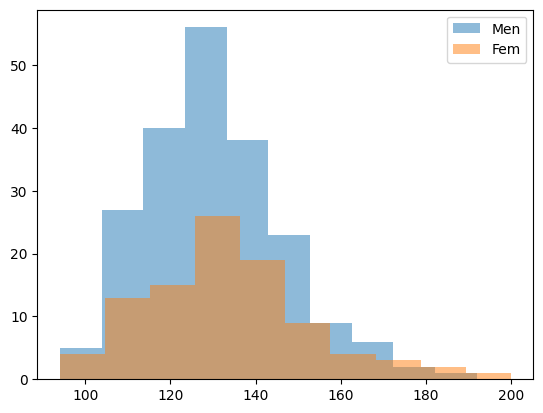

In [8]:
fem = heart[heart['sex'] == 0]['trestbps']
men = heart[heart['sex'] == 1]['trestbps']

if stats.levene(men, fem).pvalue <= 0.005: print('Нельзя использовать t-тест, т.к. дисперсии различны')
else:
    print(plt.hist(men, alpha=0.5, label='Men'), plt.hist(fem, alpha=0.5, label='Fem'))
    plt.legend()
    p_value = stats.ttest_ind(men, fem, alternative='less').pvalue
    print(f"{'Альтернативная гипотеза отвергается' if p_value >= 0.025 else 'Альтернативная гипотеза принимается'}\np_value = {p_value:.6f}")


### Задание 3
Считается, что средний уровень холестерина среди населения старше 60 лет, равен 250. Была выдвинута гипотеза, что это не так (что она не равна 250). Примите или опровергните эту гипотезу.Выведите значени p-value.

In [9]:
p_value = stats.ttest_1samp(heart[heart['age'] > 60]['chol'], 250).pvalue
print(f"{'Гипотеза опровергнута' if p_value <= 0.025 else 'Гипотеза принимается'}\np_value = {p_value}")

Гипотеза принимается
p_value = 0.15876173897401408


### Задание 4
Вычислите доверительный интервал с уровнем точности 95% для среднего значения максимальной частоты сердечных сокращений населения в городе N.

In [10]:
print(stats.t.interval(confidence=0.95, df=len(heart['thalach']), loc=heart['thalach'].mean(), scale=stats.sem(heart['thalach'])))

(147.0574696493637, 152.23625972357362)
